# Prioritization of Good-self in perceptual decision-making: A modelling approach


This script is trying to using cognitive modelling to guide future experimental design about the prioritization of moral self. 

Relevant but pre-modeling experiments can be found in Hu, et al., 2019, Notebook for perceptual salience of positive-Self (https://osf.io/83dyj/) or [Hu etal., 2020, collabra](https://www.collabra.org/article/10.1525/collabra.301/).

In this notebook, I will try to follow the suggestions by [Wilson & Collins, 2019](https://elifesciences.org/articles/49547) to re-think my previous in a modelling way.

### Preparing softwares.

For now, the modelling are based on Drift Diffusion Model (DDM), especially the [HDDM](http://ski.clps.brown.edu/hddm_docs/) package. Thus, please make sure this package is appropriatelly installed. 

The easiest way to install HDDM is using the docker image, which packaged the entire HDDM and necessary apps/librarires together.

[Install docker](https://docs.docker.com/get-docker/).

Pull the HDDM docker image from the internet ( ~ 5.6 GB)

`docker pull madslupe/hddm`

Then run the docker image in terminal:

`docker run -it --rm \
-v /you_folder_of_data:/home/jovyan/hddm \
-p 8888:8888 madslupe/hddm jupyter notebook`

You will see an url appear in the terminal, right click and open that link, you shall see two folders in the jupyter notebook: `work`, `hddm`. The `hddm` is the folder linked to the folder you stored your data. 

Before you start, it's a good habit to check which environment you are using.

In [1]:
# check which python is in use.
import sys
print('Notebook is running:', sys.executable)

# further check your python version
print('The current Python version is', sys.version)

# or uncomment the code below

# from platform import python_version

# print(python_version())

# If you are sure that conda is installed, also check the package that install
#!conda list  # list the conda

## Note that some packages may not be the latest, but it should be not a big issue.

Notebook is running: /opt/conda/bin/python
The current Python version is 3.6.3 | packaged by conda-forge | (default, Nov  4 2017, 10:10:56) 
[GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]


## Define Research Questions

In the previous experiments, we designed the experiment without thinking about the modelling and the mechanism of the effect. In the *old* way of designing experiment, we only aimed at detecting some differences between different conditions to provide evidence for the prioritization. Because of the lack of model think, the question can be answered by previous experiment are more exploratory:

* What: whether moral-self tagging will facilitate the perceptual decision-making
* How: whether the facilitation (prioritization) effect was because the tagging make the perceptual decision process easier (i.e., higher *drift rate*)?

When thinking of the generative process of the effect, we have more questions that needed to be answered:

* Why matched and mismatched has such different effect? Even [Krueger (1978)](https://doi.apa.org/record/1979-22735-001) had noted this *same-faster-different-slow* effect, but this effect were not perfectly solved. [Van Zandt et al., 2001](https://link.springer.com/article/10.3758/BF03212980) compared both race-model and diffusion model, and found that both model can fit the data well but race model might be a bit better. So the question here is, are race model and DDM qualitatively different? So far, the evidence is not very strong.But there are three models are potentially interesting to test: DDM, race model, and two-high [MPT](https://link.springer.com/article/10.3758/s13428-019-01318-x).

* Which part of the label facilitated the perceptual decision-making? Concept of **Self**. But does the physical features of the stimuli matters? E.g., if we change the label, scramble it from words to non-words? What if we replace the geometrical shape with words that represents those words? This will help us to answer this question: What is the process of the perceptual matching task? pattern recognition (visual level) or integration of semantic and visual?

* A related question to the above one: What is the baseline of particiapnts' response to shape-label pair? For example: a shape of triangle and the word "triangle". Similarly, what is the baseline of participants' response to labels? So, there are three combinations: shape-shape pair, shape-label pair, label-label pair.

* Another trivial questions: does the location of the stimuli (upper vs. down; left vs. right? or changing spatial location) matter?

* Capacity of the tagging effect? Category learning vs. a single shape? Reverse learning (Wang et al., 2017)? Or Associative learning without an instruction? Can the self-tagging break the *natural* categories? For example, using objects vs. tools for self vs other, and both the objects and tools are half self, half other. How will it change the effect of learning? These questions may related to reinforcement learing + DDM

## Step 1: Design Experiment

This part may reserve for later experiment, but for now, I will take my previous experimental data. These experimental design have the following parameters (in the perspective of DDM):

* N -- Number of trials

* Difficulty -- 2 (matchness: mismatch vs match) by 3 (valence: Good, Bad, Neutral)

* Probability -- match vs. mismatch, 50% in most experiment, but the ratio do changed in some experiment; Valence, 1/3 per condition

* Reaction standard -- as fast and accurately as possible, equal for all participants.

## Step 2: Build Models

In this step, I will try to think of several models to create a model space:

### Model 1: random choose model
In this model, participant randomly choose one of the options, usually as faster as they can, to finish the experiment.

$$ RESP_{ik} = RT_{base} + p_{k}$$
where the response is determined by the basic reaction time $RT_{base}$ and the probability of choosing the option $k$

### Model 2: DDM with single response strategy:
In this model, participant response as DDM assumed, but take match and mismatch the same.

$$ f(x|v,a,z) = \frac{\pi}{\alpha^{2}} exp \left( -vaz - \frac{v^{2}x}{2} \right) \times \sum\limits_{k=1}^{\infty} k \, exp \left(-\frac{k^{2} \pi^{2}x}{2 a^{2}} \right) sin(k \pi z)$$

$$ RT = DT + T_{er}$$
Where $RT$ is the response time, $DT$ is the decision time, $T_{er}$ is non-decision time.


### Model 3: DDM with two reponse strategies:
In this model, matching and mismatching trials are considered as different perceptual process


### Model 4: DDM with influence of previous feedback
In this model, the reaction time not only influence by the drift rate, doundary separation and intial bias, but also the previous trial's feedback: correct-stay-wrong-shift.


## Step 3: Simulation

Based on the models defined above, we simulate the data for each model so that we can have precise predictions.

In [3]:
%matplotlib inline

# Preparation
import hddm

# import sys tools
import os, time, csv, datetime

# import the toolbox
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

In [4]:
# Generate random data, assuming that only drift rate is different. 
# for more details about hddm.generate.gen_rand(), uncomment below:
# ?hddm.generate.gen_rand
# import kabuki
# ?kabuki.generate.gen_rand_data

df_gen, prms_gen = hddm.generate.gen_rand_data({'cond1': {'v':1.5, 'a':1, 't':.4, 'z': 0.55},
                                                'cond2': {'v':2.5, 'a':1, 't':.4, 'z': 0.55},
                                                'cond3': {'v':3.5, 'a':1, 't':.4, 'z': 0.55}}, 
                                               n_fast_outliers= 5, 
                                               n_slow_outliers=5,
                                               subj_noise=0.1, # how much to pertub individual subj params, default = 0.1
                                               size = 300,
                                               subjs = 12)

# can we really distinguish two distribution by their drift rate?

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [5]:
#prms_gen
df_gen.shape

(10810, 4)

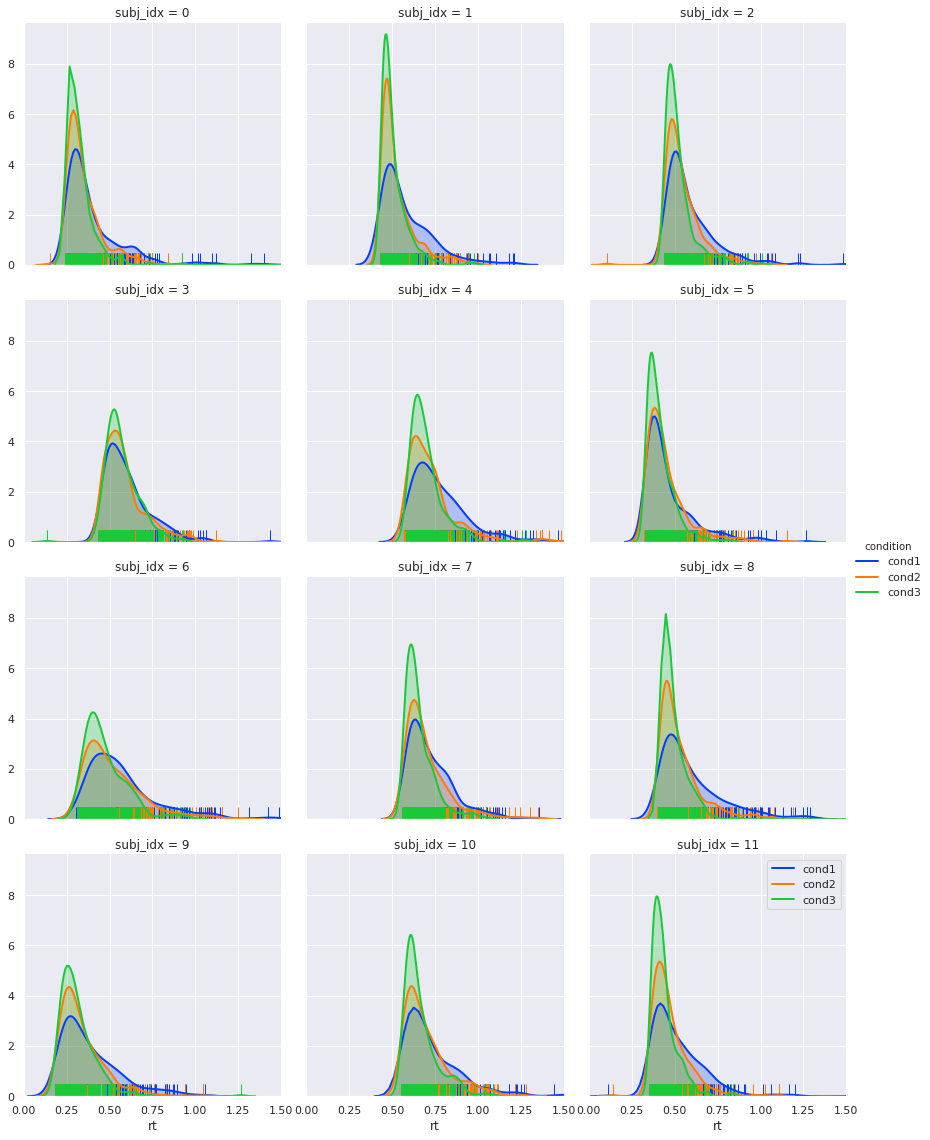

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

g = sns.FacetGrid(df_gen, col='subj_idx', col_wrap=3, hue="condition", height=4, palette="bright")
g = (g.map(sns.distplot, "rt", hist = False, kde = True,
           kde_kws = {'shade': True, 'linewidth': 2}, rug=True)
     .set(xlim=(0, 1.5))  # , ylim=(0, 12))
     .add_legend())

plt.legend()